 ## EDA 

#### 1. __Cargar librerías y datos__


In [118]:
# Data analysis and wrangling
import numpy as np
import pandas as pd

# Graphs
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocessing and model selection
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Matplotlib configuration
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Warnings configuration
import warnings
warnings.filterwarnings('ignore')


Cargamos el conjunto de datos desde el archivo CSV


In [119]:
df = pd.read_csv("../data/attrition_availabledata_03.csv")

#### 2. __Exploración inicial__

En esta sección revisamos la estructura general del dataset


In [120]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2925 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2919 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  EmployeeCount            2940 non-null   int64  
 14  EmployeeID              

In [121]:
dataset_shape = df.shape
print(f"El dataset contiene {dataset_shape[0]} filas y {dataset_shape[1]} columnas.")

El dataset contiene 2940 filas y 31 columnas.


In [122]:
df.describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2925.000000,2928.000000,2919.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2927.000000,2940.000000,2940.0,2940.000000,2934.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.326447,12.701701,2.740476,3.160884,2.726496,2.715847,2.756423,36.782653,9.287755,2.902721,...,65115.350340,2.664161,15.260544,8.0,0.789796,11.262440,2.812925,6.988095,2.192517,4.127891
std,1.334478,5.518054,0.718440,0.367487,1.093007,1.099055,0.717885,9.157614,8.157695,1.030032,...,47196.796005,2.495031,3.706960,0.0,0.843302,7.787843,1.287138,5.994740,3.220122,3.540747
min,5.416880,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,...,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285664,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,...,28860.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,7.029037,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,...,48980.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.907145,17.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,...,83920.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.937261,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,...,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [123]:
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,6.466932,14,3,4,3.0,3.0,3.0,34,Non-Travel,Research & Development,...,Y,20,8,1,6.0,3,3,1,2,No
1,6.976151,19,3,3,3.0,1.0,3.0,28,Travel_Rarely,Sales,...,Y,15,8,0,3.0,6,3,1,2,No
2,6.076227,13,2,3,4.0,3.0,3.0,24,Travel_Rarely,Sales,...,Y,12,8,0,1.0,2,1,0,0,Yes
3,7.426888,5,2,3,3.0,2.0,3.0,38,Travel_Rarely,Research & Development,...,Y,19,8,1,7.0,3,5,1,4,Yes
4,5.783249,14,2,3,3.0,4.0,3.0,26,Travel_Rarely,Sales,...,Y,12,8,0,5.0,2,5,1,2,No


In [124]:
df[['Attrition']].head()

,Attrition
0,No
1,No
2,Yes
3,Yes
4,No


Este es un problema de __clasificación__, ya que la variable objetivo (Attrition) es binaria (Yes / No). Esto significa que el modelo debe predecir si un empleado abandonará o no la empresa, en lugar de predecir un valor numérico.

#### 3. __Identificamos las variables categóricas y numéricas__

In [125]:
# Identificar variables categóricas y numéricas
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Variables categóricas:", categorical_columns)
print("Variables numéricas:", numerical_columns)

Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


- Reclasificamos las variables añadiendo ordinales

In [126]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_columns = ["Education", "JobLevel", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "PerformanceRating", "StockOptionLevel"]
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Eliminamos de numéricas las que hemos clasificado como ordinales
numerical_columns = [col for col in numerical_columns if col not in ordinal_columns]

print("Variables categóricas:", categorical_columns)
print("Variables ordinales:", ordinal_columns)
print("Variables numéricas:", numerical_columns)


Variables categóricas: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables ordinales: ['Education', 'JobLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating', 'StockOptionLevel']
Variables numéricas: ['hrs', 'absences', 'JobInvolvement', 'Age', 'DistanceFromHome', 'EmployeeCount', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### 4. __Análisis de la variable objetivo__

Revisamos la distribución de la variable objetivo para identificar desbalance de clases


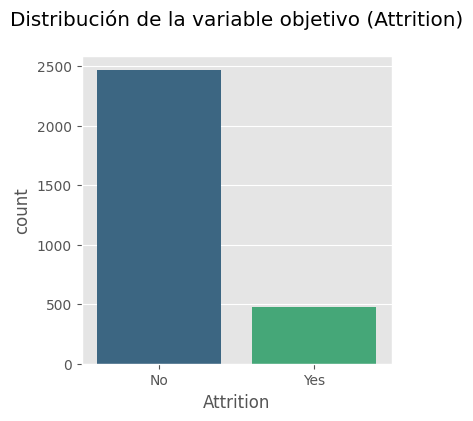

,proportion
0,83.877551
1,16.122449


In [127]:
# Balance de la variable objetivo "Attrition"
if "Attrition" in df.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df["Attrition"], palette="viridis")
    plt.title("Distribución de la variable objetivo (Attrition)\n")
    plt.show()
    
    attrition_counts = df["Attrition"].value_counts(normalize=True)
    display(pd.DataFrame(attrition_counts).rename(columns={"Attrition": "Proportion"}).reset_index(drop=True)*100)


In [128]:
df.Attrition.value_counts().sort_index().to_frame()

,count
Attrition,
No,2466
Yes,474


 El dataset está desbalanceado, con 2466 empleados que no abandonan la empresa (NO) y 474 que sí lo hacen (SI). 
 
 Esto significa que la mayoría de los empleados no abandonan la empresa, lo que podría causar que un modelo mal entrenado siempre prediga "No", logrando una precisión aparente alta, pero sin realmente capturar los casos de abandono.

Por lo tanto la solución sería aplicar técnicas como:

- Oversampling (SMOTE): Aumentar el número de ejemplos de la clase minoritaria (Yes).
- Undersampling: Reducir los casos de la clase mayoritaria (No).
- Pesos en los modelos: Ajustar la importancia de la clase minoritaria. 



#### 5. __Identificar valores nulos__

In [129]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].to_frame().reset_index()
missing_values.columns = ["Column Name", "Missing Values"]

display(missing_values)

,Column Name,Missing Values
0,EnvironmentSatisfaction,15
1,JobSatisfaction,12
2,WorkLifeBalance,21
3,NumCompaniesWorked,13
4,TotalWorkingYears,6


#### 6. __Identificar variables constantes e identidicativas__

- Comprobamos si existen columnas con valores únicos

In [130]:
unique_values = df.nunique()

constant_columns = df.nunique()[df.nunique() == 1].to_frame().reset_index()
constant_columns.columns = ["Column Name", "Unique Value Count"]
constant_columns["Unique Value"] = constant_columns["Column Name"].apply(lambda col: df[col].unique()[0])
constant_columns_list = constant_columns["Column Name"].tolist()

display(constant_columns)

,Column Name,Unique Value Count,Unique Value
0,EmployeeCount,1,1
1,Over18,1,Y
2,StandardHours,1,8


- Comprobamos si hay columnas con variables ID

In [131]:
id_columns = [col for col in df.columns if df[col].nunique() == len(df)]
print("Columnas identificativas detectadas:", id_columns)

Columnas identificativas detectadas: ['EmployeeID']


- Eliminar las columnas constantes e identificativas

In [132]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric = df_numeric.drop(columns=constant_columns_list, errors='ignore')
df_numeric = df_numeric.drop(columns=id_columns, errors='ignore')

print('Se han eliminado las columnas:', constant_columns_list + id_columns)

Se han eliminado las columnas: ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']


#### 7. __Crear matriz de correlación__

Generamos la matriz de correlación para entender relaciones entre las variables numéricas, habiendo eliminado ya las constantes y las identificativas.

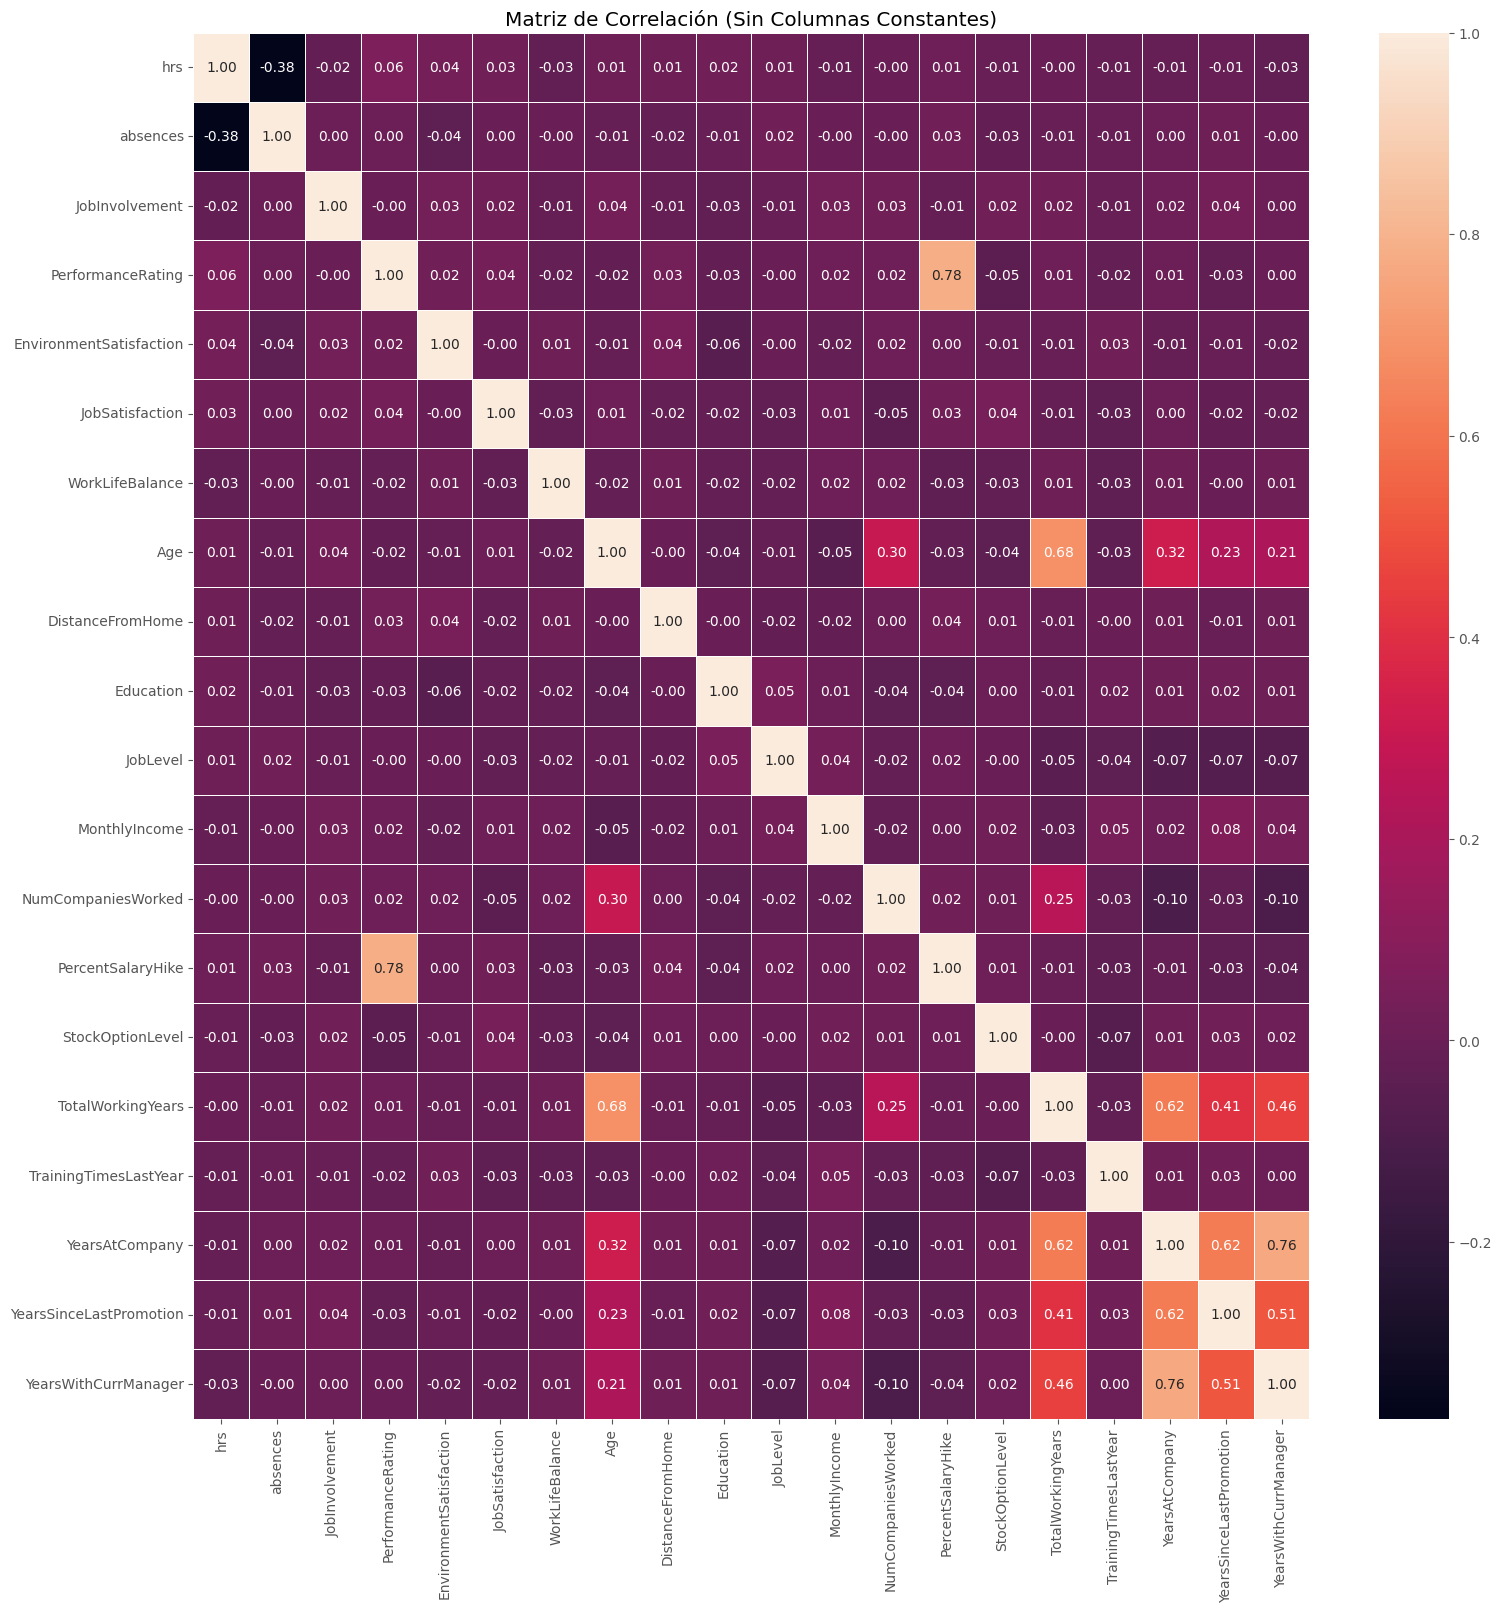

In [133]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación (Sin Columnas Constantes)")
plt.show()

#### 8. __Histogramas de Variables Numéricas__

Visualizamos la distribución de las variables numéricas mediante histogramas

<Figure size 1000x1000 with 0 Axes>

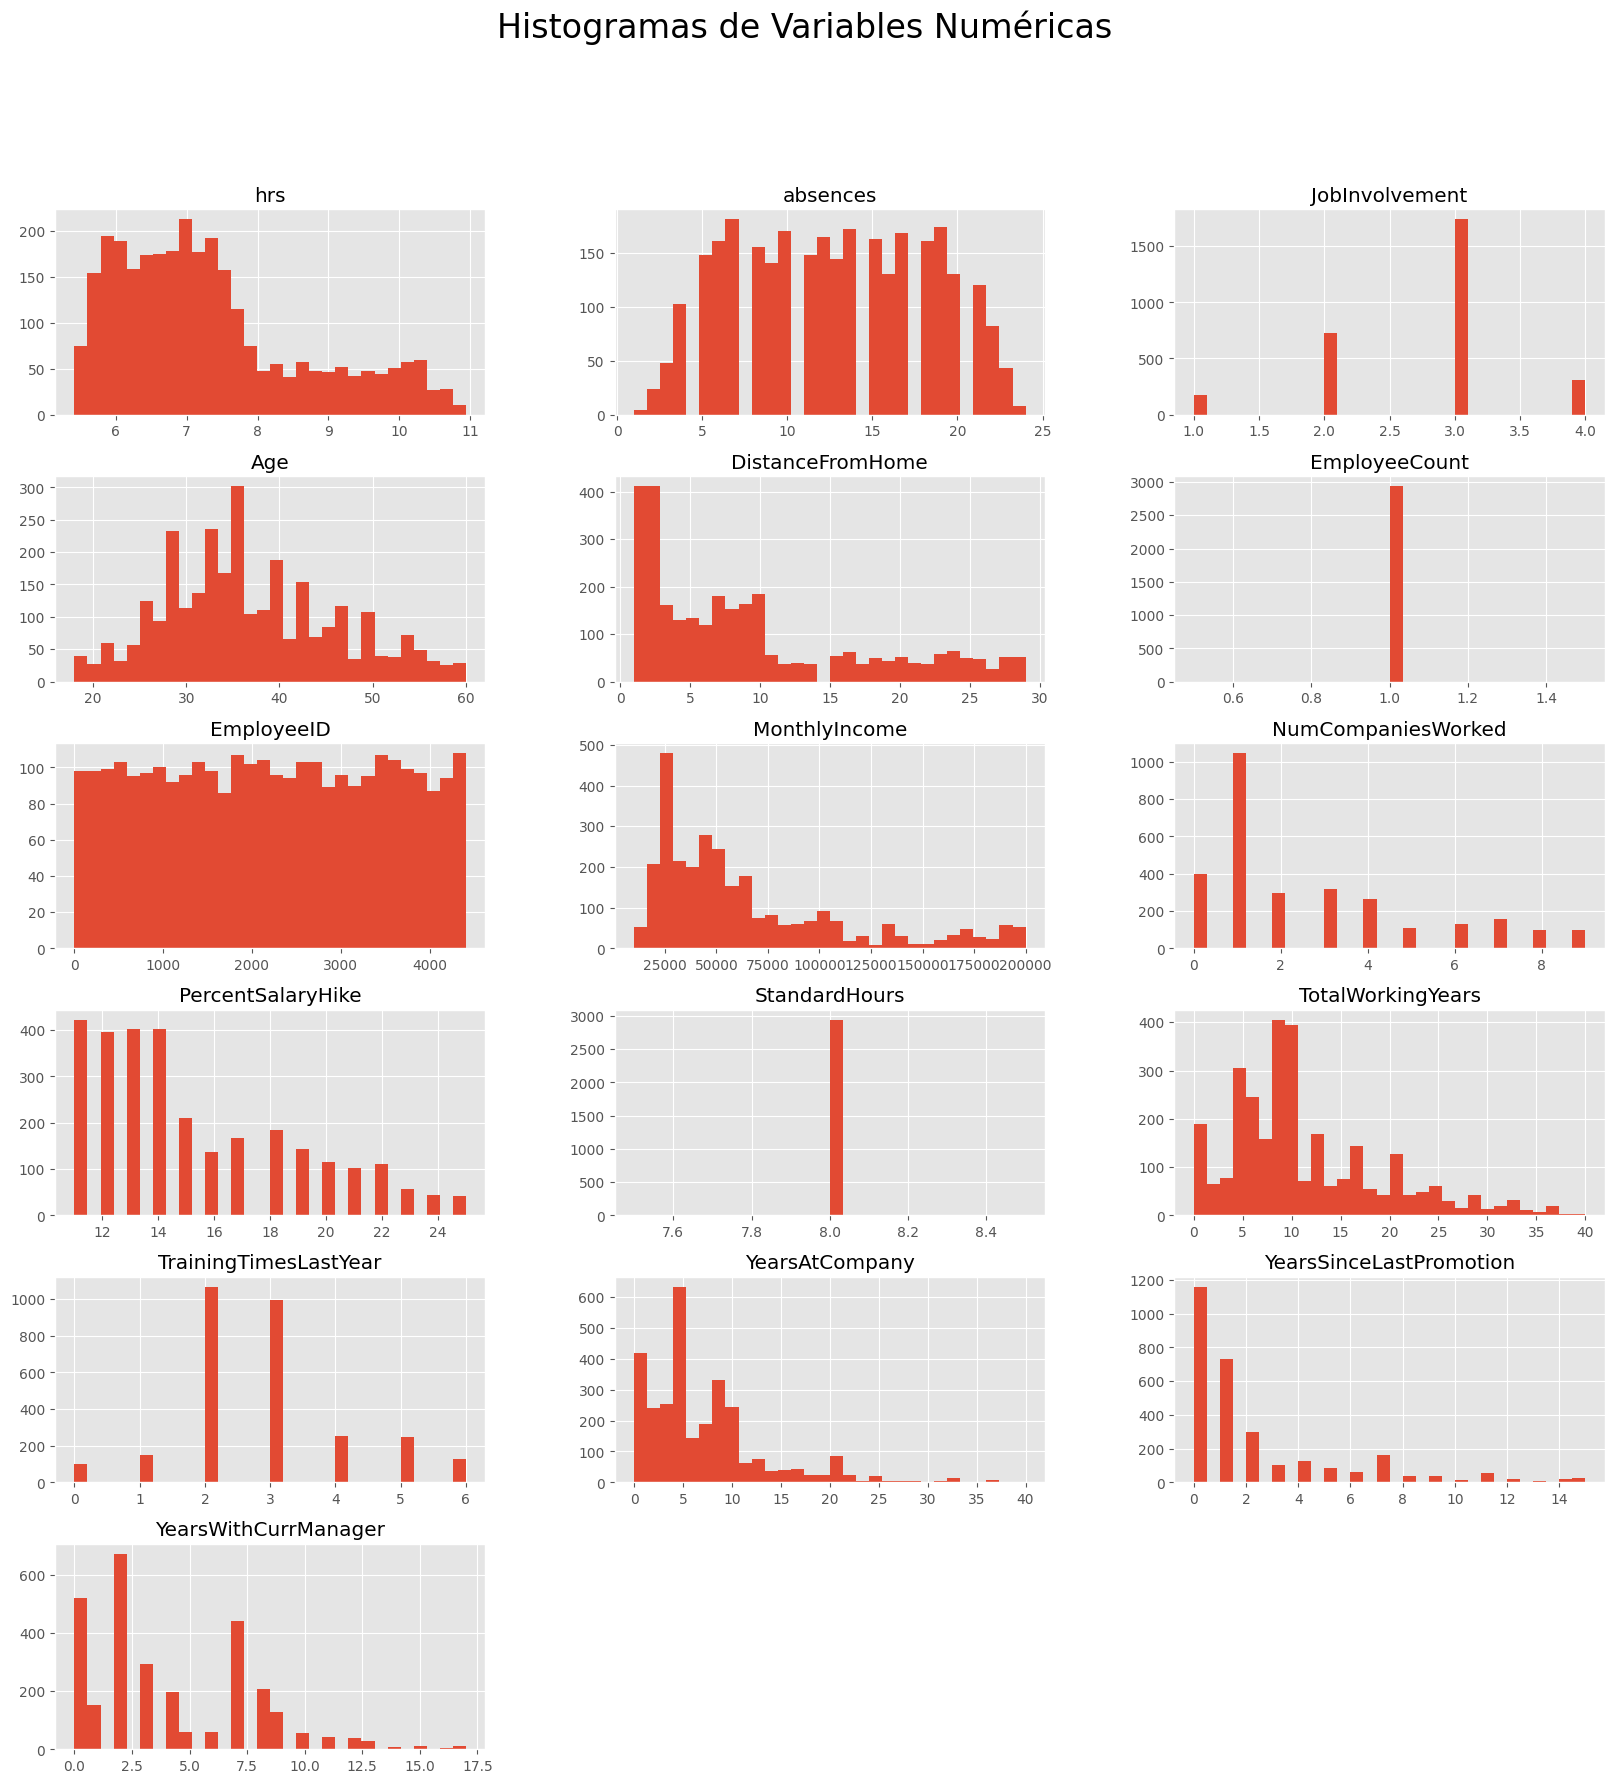

In [147]:
plt.figure(figsize=(10, 10))
df[numerical_columns].hist(bins=30, figsize=(20, 20), layout=(len(numerical_columns)//3 + 1, 3))
plt.suptitle("Histogramas de Variables Numéricas", fontsize=24)
plt.show()